<a href="https://colab.research.google.com/github/fahriyegrl/NJIT_Modern_CNN_Assignment/blob/main/Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Note to grader:** Each question consists of parts, e.g. Q1(i), Q1(ii), etc. Each part must be first graded  on a 0-4 scale, following the standard NJIT convention (A:4, B+: 3.5, B:3, C+: 2.5, C: 2, D:1, F:0). However, any given item may be worth 4 or 8 points; if an item is worth 8 points, you need to accordingly scale the 0-4 grade.


The total score must be re-scaled to 100. That should apply to all future assignments so that Canvas assigns the same weight on all assignments.



**Installing and Importing required modules**

In [1]:
!pip install d2l==0.16.1


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.7/76.7 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 36.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 385.8/385.8 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.5/133.5 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 4.1 MB/s eta 0:00:00
  Attempting uninstall: jupyter-client
    Found existing installation: jupyter-client 6.1.12
    Uninstalling jupyter-client-6.1.12:
      Successfully uninstalled jupyter-client-6.1.12
  Attempting uninstall: jupyter-server
    Found existing installation: jupyter-server 1.24.0
    Uninstalling jupyter-server-1.24.0:
      Successfully uninstalled jupyter-server-1.24

In [2]:
from d2l import torch as d2l
import torch
from torch import nn

# <font color = 'blue'>  **Assignment 3**

This assignment tries to further develop your understanding of Convolutional Neural Networks. The notebook is based on the Alexnet noteebook from lecture 4.


In [3]:

net = nn.Sequential(
    # Here, we use a larger 11 x 11 window to capture objects. At the same
    # time, we use a stride of 4 to greatly reduce the height and width of the
    # output. Here, the number of output channels is much larger than that in
    # LeNet
    nn.Conv2d(1, 96, kernel_size=11, stride=4, padding=1), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    # Make the convolution window smaller, set padding to 2 for consistent
    # height and width across the input and output, and increase the number of
    # output channels
    nn.Conv2d(96, 256, kernel_size=5, padding=2), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    # Use three successive convolutional layers and a smaller convolution
    # window. Except for the final convolutional layer, the number of output
    # channels is further increased. Pooling layers are not used to reduce the
    # height and width of input after the first two convolutional layers
    nn.Conv2d(256, 384, kernel_size=3, padding=1), nn.ReLU(),
    nn.Conv2d(384, 384, kernel_size=3, padding=1), nn.ReLU(),
    nn.Conv2d(384, 256, kernel_size=3, padding=1), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    nn.Flatten(),
    # Here, the number of outputs of the fully-connected layer is several
    # times larger than that in LeNet. Use the dropout layer to mitigate
    # overfitting
    nn.Linear(6400, 4096), nn.ReLU(),
    nn.Dropout(p=0.5),
    nn.Linear(4096, 4096), nn.ReLU(),
    nn.Dropout(p=0.5),
    # Output layer. Since we are using Fashion-MNIST, the number of classes is
    # 10, instead of 1000 as in the paper
    nn.Linear(4096, 10))

We construct a single-channel data example with both height and width of 224 to observe the output shape of each layer.


In [4]:
X = torch.randn(1, 1, 224, 224)
for layer in net:
    X=layer(X)
    print(layer.__class__.__name__,'Output shape:\t',X.shape)

Conv2d Output shape:	 torch.Size([1, 96, 54, 54])
ReLU Output shape:	 torch.Size([1, 96, 54, 54])
MaxPool2d Output shape:	 torch.Size([1, 96, 26, 26])
Conv2d Output shape:	 torch.Size([1, 256, 26, 26])
ReLU Output shape:	 torch.Size([1, 256, 26, 26])
MaxPool2d Output shape:	 torch.Size([1, 256, 12, 12])
Conv2d Output shape:	 torch.Size([1, 384, 12, 12])
ReLU Output shape:	 torch.Size([1, 384, 12, 12])
Conv2d Output shape:	 torch.Size([1, 384, 12, 12])
ReLU Output shape:	 torch.Size([1, 384, 12, 12])
Conv2d Output shape:	 torch.Size([1, 256, 12, 12])
ReLU Output shape:	 torch.Size([1, 256, 12, 12])
MaxPool2d Output shape:	 torch.Size([1, 256, 5, 5])
Flatten Output shape:	 torch.Size([1, 6400])
Linear Output shape:	 torch.Size([1, 4096])
ReLU Output shape:	 torch.Size([1, 4096])
Dropout Output shape:	 torch.Size([1, 4096])
Linear Output shape:	 torch.Size([1, 4096])
ReLU Output shape:	 torch.Size([1, 4096])
Dropout Output shape:	 torch.Size([1, 4096])
Linear Output shape:	 torch.Size([1,

## Reading the Dataset

Although AlexNet is trained on ImageNet in the paper, we use Fashion-MNIST here
since training an ImageNet model to convergence could take hours or days
even on a modern GPU.
One of the problems with applying AlexNet directly on Fashion-MNIST
is that its images have lower resolution ($28 \times 28$ pixels)
than ImageNet images.
To make things work, we upsample them to $224 \times 224$
(generally not a smart practice,
but we do it here to be faithful to the AlexNet architecture).
We perform this resizing with the `resize` argument in the `d2l.load_data_fashion_mnist` function.


In [5]:
batch_size = 128
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=224)

100%|██████████| 26.4M/26.4M [00:01<00:00, 13.2MB/s]


Extracting ../data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ../data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 215kB/s]


Extracting ../data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:01<00:00, 3.81MB/s]


Extracting ../data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ../data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 13.7MB/s]

Extracting ../data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw




/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


loss 0.329, train acc 0.879, test acc 0.883
1450.6 examples/sec on cuda:0


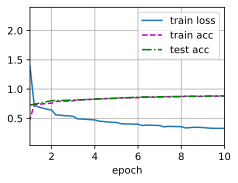

In [6]:
lr, num_epochs = 0.01, 10
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr)



## <font color = 'blue'>  **Question 1** <font>

<font color = 'blue'>  Alexnet was written for images of size 224x224. Clearly it is an overkill for the Fashion MNIST data set which has size 28x28.

<font color = 'blue'> (i) Construct a model that mimics the architecture of Alexnet, but works directly on images of size 28x28.

<font color = 'blue'> (ii) What is the accuracy you reach?

<font color = 'blue'> (iii) Also compare the running time of your model with that of the original Alexnet on the resized images.

<font color = 'blue'>[**Guidelines**: In general, here you probably want to use smaller kernels, and fewers convolutional layers. The most important part of this exercise is to get the dimensions of the layers correct, so that the model works. Try not to use 'Lazy' layers, so that you better understand the dimensions. Also some experimentation with different designs would be good. Feel free to discuss all experiments you did.]


In [7]:
# your answers here

# (i): I updated the model, still have 5 conv layes but works on 28X28 images
# I reduces the parameters for the snmaller images. AlexNet used 11x11 kernel, I updated it to 5X5

import torch
from torch import nn

class AlexNet_28(nn.Module):
    def __init__(self, num_classes=10):
        super(AlexNet_28, self).__init__()
        self.net = nn.Sequential(
            # First Conv Layer: (28x28) -> (24x24) -> (12x12)
            nn.Conv2d(1, 64, kernel_size=5, stride=1, padding=0), nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Second Conv Layer: (12x12) -> (10x10) -> (5x5)
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=0), nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Third Conv Layer: (5x5) -> (5x5)
            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1), nn.ReLU(),

            # Fourth Conv Layer: (5x5) -> (5x5)
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1), nn.ReLU(),

            # Fifth Conv Layer: (5x5) -> (5x5)
            nn.Conv2d(256, 128, kernel_size=3, stride=1, padding=1), nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2), # Output: (2x2)

            nn.Flatten(),
            nn.Linear(128*2*2, 1024), nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(1024, 512), nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, num_classes) # 10 classes for Fashion-MNIST
        )

    def forward(self, x):
        return self.net(x)


model = AlexNet_28()
X = torch.randn(1, 1, 28, 28)
print(model(X).shape)



torch.Size([1, 10])


In [8]:
#(ii)

batch_size = 128
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size) #no resize needed

loss 0.508, train acc 0.810, test acc 0.825
11396.1 examples/sec on cuda:0


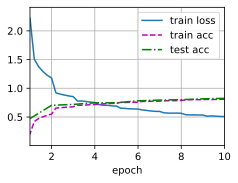

In [9]:
lr, num_epochs = 0.01, 10
d2l.train_ch6(model, train_iter, test_iter, num_epochs, lr)

In [10]:
### AlexNet for 28×28 Fashion-MNIST resuls are:

#Training Accuracy: 81.0%
#Test Accuracy: 82%
#Loss: 0.508
#Speed: 11,396 examples/sec on CUDA

# Compared to the standard AlexNet trained on ImageNet, this accuracy is expected since Fashion-MNIST is simpler.
# With further tuning, we might reach higher test accuracy.I used the same epoch, lr as it is used in the original AlexNet.

#(iii)
# The Modified AlexNet (28×28)
    # Test Accuracy: 82%
    # Speed: 11,396 examples/sec on CUDA
# Original AlexNet (224×224)
    #Test Accuracy: 88.2%
    #Speed: 1,450 examples/sec on CUDA

# The modified AlexNet(28) is  almost 8x faster than the original.
# Original AlexNet works on 224x224 images, it means more memory and computation.
# And the original AlexNet has more filer and pooling & stride sizes are optimized for 28×28.


In [11]:
# for grader use only

# insert grade here  (out of 12)

# G[1] =
#
# please justify point subtractions when needed



## <font color = 'blue'>  **Question 2** <font>

<font color = 'blue'>  Now let's go back to the original Alexnet. In the class we trained it for 10 epochs.

<font color = 'blue'>  (i) Train it for 50 epochs and record the training and test accuracy.

<font color = 'blue'>  (ii) Take the MNIST dataloader and modify it, so that each image in the dataset gets a **random** label, in place of its correct label.

<font color = 'blue'>  (iii) Retrain AlexNet with the new modified dataset. This time train it for 500 epochs. What is the training and test accuracy? Can you justify them? Discuss your thoughts.





In [12]:
# Q-2 (i)
batch_size = 128
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=224)


In [13]:
X1 = torch.randn(1, 1, 224, 224).cuda()
for layer in net:
    X1=layer(X1)
    print(layer.__class__.__name__,'Output shape:\t',X1.shape)

Conv2d Output shape:	 torch.Size([1, 96, 54, 54])
ReLU Output shape:	 torch.Size([1, 96, 54, 54])
MaxPool2d Output shape:	 torch.Size([1, 96, 26, 26])
Conv2d Output shape:	 torch.Size([1, 256, 26, 26])
ReLU Output shape:	 torch.Size([1, 256, 26, 26])
MaxPool2d Output shape:	 torch.Size([1, 256, 12, 12])
Conv2d Output shape:	 torch.Size([1, 384, 12, 12])
ReLU Output shape:	 torch.Size([1, 384, 12, 12])
Conv2d Output shape:	 torch.Size([1, 384, 12, 12])
ReLU Output shape:	 torch.Size([1, 384, 12, 12])
Conv2d Output shape:	 torch.Size([1, 256, 12, 12])
ReLU Output shape:	 torch.Size([1, 256, 12, 12])
MaxPool2d Output shape:	 torch.Size([1, 256, 5, 5])
Flatten Output shape:	 torch.Size([1, 6400])
Linear Output shape:	 torch.Size([1, 4096])
ReLU Output shape:	 torch.Size([1, 4096])
Dropout Output shape:	 torch.Size([1, 4096])
Linear Output shape:	 torch.Size([1, 4096])
ReLU Output shape:	 torch.Size([1, 4096])
Dropout Output shape:	 torch.Size([1, 4096])
Linear Output shape:	 torch.Size([1,

loss 0.118, train acc 0.956, test acc 0.921
1446.2 examples/sec on cuda:0


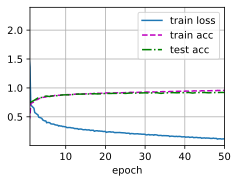

In [14]:
lr, num_epochs = 0.01, 50
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr)


In [15]:
# (ii) Modifying the MNIST

import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
import random

transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor()])
mnist_train = torchvision.datasets.FashionMNIST(root="./data", train=True, download=True, transform=transform)
mnist_test = torchvision.datasets.FashionMNIST(root="./data", train=False, download=True, transform=transform)


100%|██████████| 26.4M/26.4M [00:01<00:00, 14.2MB/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 208kB/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:01<00:00, 3.89MB/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 10.3MB/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [16]:
mnist_train.targets[:5]

tensor([9, 0, 0, 3, 0])

In [17]:
random.seed(42)
num_classes = 10
random_train_labels = torch.randint(0, num_classes, (len(mnist_train),))
random_test_labels = torch.randint(0, num_classes, (len(mnist_test),))

In [18]:
mnist_train.targets = random_train_labels
mnist_test.targets = random_test_labels

In [19]:
mnist_train.targets[:5]

tensor([0, 3, 4, 3, 2])

In [20]:
mnist_test.targets[:5]

tensor([3, 8, 1, 9, 5])

In [21]:
## Creating the dataloaders
batch_size = 128
train_loader = DataLoader(mnist_train, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(mnist_test, batch_size=batch_size, shuffle=False)

In [22]:
for images, labels in test_loader:
    print("Random Labels:", labels[:5])
    break

Random Labels: tensor([3, 8, 1, 9, 5])


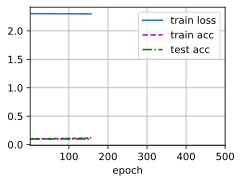

In [ ]:
# (iii)
lr, num_epochs = 0.01, 500

# Train with randomized labels
d2l.train_ch6(net, train_loader, test_loader, num_epochs, lr)


In [ ]:
# (iii)
# import torch
# import torch.nn as nn
# import torch.optim as optim

# num_epochs = 500

# criterion = nn.CrossEntropyLoss()
# optimizer = optim.Adam(net.parameters(), lr=0.01)
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# net = net.to(device)


# for epoch in range(num_epochs):
#     net.train()
#     total_loss, correct, total = 0, 0, 0
#     for images, labels in train_loader:
#         images, labels = images.to(device), labels.to(device)

#         # Forward pass
#         outputs = net(images)
#         loss = criterion(outputs, labels)

#         # Backward pass
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()

#         # Track accuracy
#         total_loss += loss.item()
#         _, predicted = outputs.max(1)
#         correct += (predicted == labels).sum().item()
#         total += labels.size(0)

#     train_acc = correct / total
#     print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss:.4f}, Train Accuracy: {train_acc:.4f}")

# # Evaluate on test set
# net.eval()
# correct, total = 0, 0
# with torch.no_grad():
#     for images, labels in test_loader:
#         images, labels = images.to(device), labels.to(device)
#         outputs = net(images)
#         _, predicted = outputs.max(1)
#         correct += (predicted == labels).sum().item()
#         total += labels.size(0)

#     test_acc = correct / total
#     print(f"Final Test Accuracy: {test_acc:.4f}")

In [ ]:
#(iii) continuing
### Since labels are random, and no matching images,
### making it impossible for the model to learn meaningful patterns.
### There are 10 classess ,and the model does random guessing, the accuracy is around %10 (1/10 classes)


In [ ]:
# for grader use only

# insert grade here  (out of 12)

# G[2] =
#
# please justify point subtractions when needed

In [ ]:
# total score
max_score = 24
$inal_score = sum(G)*(100/max_score)